<a href="https://colab.research.google.com/github/BhanuMythreyi/Calories-Burnt-Estimator/blob/main/Estimating_the_amount_of_Calories_Burned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# numpy is used to create and handle arrays
import pandas as pd
# pandas is used to make data frames.The data sets we have will be converted into structured tabular format(data frame)
import matplotlib.pyplot as plt
# used to create plots and graphs
import seaborn as sns
# seaborn is also a data visualization library like matplotlib
from sklearn import metrics
# metrics is used to evaluate our model
from sklearn.model_selection import train_test_split
# sklearn is an important machine learning library
from xgboost import XGBRegressor

In [ ]:
#In this step we will load the data from the csv extension file to a pandas file.
calo = pd.read_csv('/content/calories.csv')

In [ ]:
# Viewing the data file
calo

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [ ]:
exer = pd.read_csv('/content/exercise.csv')

In [ ]:
exer

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


Now in the next step we will combine the two data frames that we downloaded from kaggle

In [ ]:
cal = pd.concat([exer,calo['Calories']],axis=1) 
# axis value is 1 because we are concatinating a column which basically concatinates the column after all the columns in the original data, if we are supposed to concatinate a row then we give 0 as axis value


In [ ]:
cal

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
cal.shape # This returns us a tuple containing the number of rows and columns

(15000, 9)

In [ ]:
# Checking whether there is any missing data, basically we can check whether we can get non-null for all the rows
cal.info()
# we can also use isnull method for confirmation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
cal.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Analysis of the data

In [ ]:
# Mean value of each column can be determined as.....
cal.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
sns.set() # this command will give basic theme, it will provide something like grid lines and back ground details

Now we analyse each and every column in the data set seperately

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


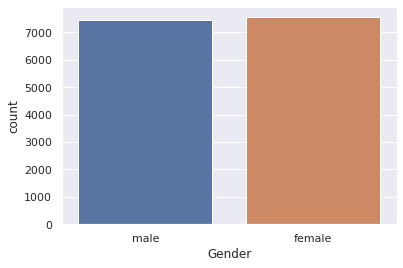

In [ ]:
sns.countplot(cal['Gender'])
# Analysing the gender wise data, analysing the distribution of male and female.We use countplot as there are only two possible values for any data that is either male or female(considering this data set)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


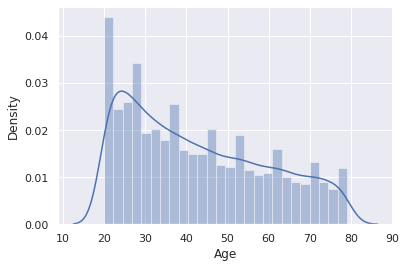

In [ ]:
sns.distplot(cal['Age'])
# Now that for age we can have any value that is it is not bound for two or three values. We will be having multiple values possible. Hence we used distributionplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


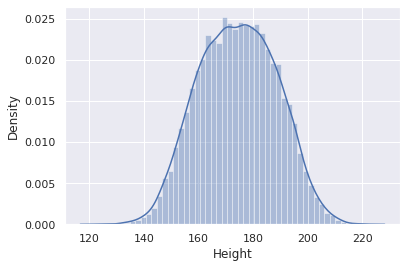

In [ ]:
# Similarly even height can have a wide range and hence we use distributionplot
sns.distplot(cal['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


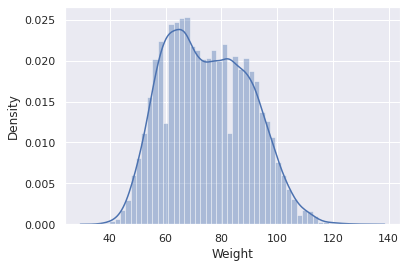

In [ ]:
# Similarly even weight can have a wide range and hence we use distributionplot
sns.distplot(cal['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


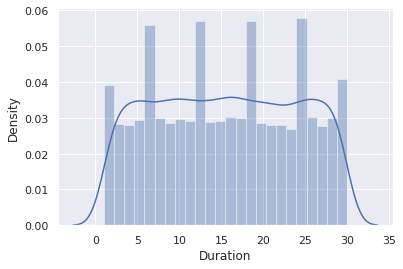

In [ ]:
sns.distplot(cal['Duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


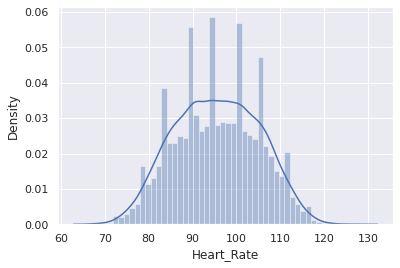

In [ ]:
sns.distplot(cal['Heart_Rate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


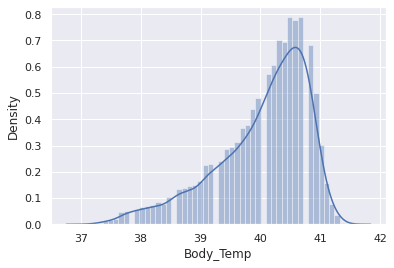

In [ ]:
sns.distplot(cal['Body_Temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


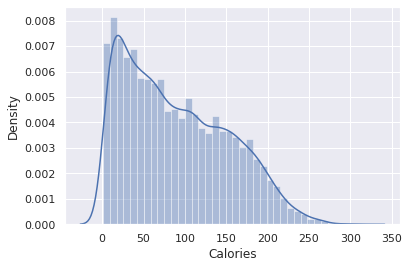

In [ ]:
sns.distplot(cal['Calories'])

Identifying the correlation between the data

> Two Kinds of correlation exists:
*   Positive Correlation: When two column values are directly proportional
*   Negative Correlation: When two column values are inversly proportional



In [ ]:
correlation = cal.corr()

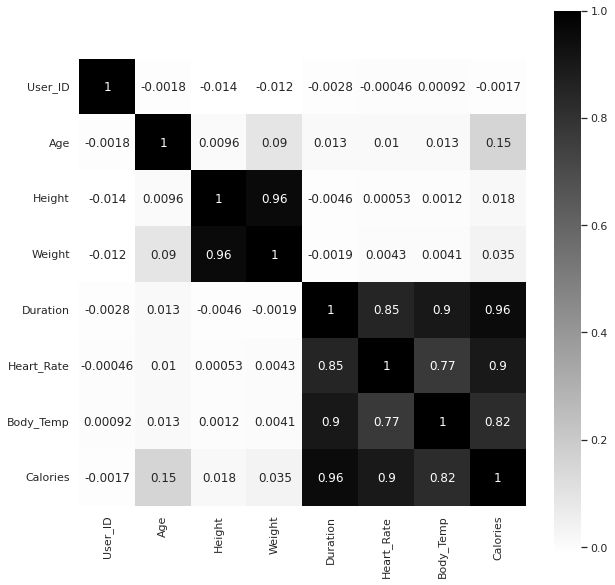

In [ ]:
# Visualizing correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,cmap='binary')

In [ ]:
# replacing Gender column to numerical values
cal.replace({'Gender':{'female':0,'male':1}},inplace=True)
cal

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
# now it is time to seperate features and target

In [ ]:
A = cal.drop(columns=['User_ID','Calories'],axis = 1) # Thw columns dropped here must be stored in another variable
B = cal['Calories']

In [ ]:
print(A)
print('--------------------------------------------------------------------------------------')
print(B)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
--------------------------------------------------------------------------------------
0        231.0
1         66.0
2         26.0
3         71.0
4         3

In [ ]:
# Now we must split the data into training and testing data
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.362,random_state=2)

In [ ]:
print(A.shape,A_train.shape,A_test.shape)

(15000, 7) (9570, 7) (5430, 7)


Model Training using XGBoost Regressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(A_train,B_train) # model training, it finds the pattern between the data automatically

[17:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Model Evaluation

In [ ]:
# Prediction on test data
test_data_pred = model.predict(A_test)
print(test_data_pred)

[130.50204  223.65062   38.42345  ... 130.01613   16.436415   6.267221]


In [ ]:
# Mean Absolute Eror is being used
mae = metrics.mean_absolute_error(B_test,test_data_pred)
print(mae)

2.5888135554876115
